In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
class MyNeuralNetwork():
    """
    My implementation of a Neural Network Classifier.
    """

    acti_fns = ['relu', 'sigmoid', 'linear', 'tanh', 'softmax']
    weight_inits = ['zero', 'random', 'normal']

    def __init__(self, n_layers, layer_sizes, activation, learning_rate, weight_init, batch_size, num_epochs):
        """
        Initializing a new MyNeuralNetwork object

        Parameters
        ----------
        n_layers : int value specifying the number of layers

        layer_sizes : integer array of size n_layers specifying the number of nodes in each layer

        activation : string specifying the activation function to be used
                     possible inputs: relu, sigmoid, linear, tanh

        learning_rate : float value specifying the learning rate to be used

        weight_init : string specifying the weight initialization function to be used
                      possible inputs: zero, random, normal

        batch_size : int value specifying the batch size to be used

        num_epochs : int value specifying the number of epochs to be used
        """

        if activation not in self.acti_fns:
            raise Exception('Incorrect Activation Function')

        if weight_init not in self.weight_inits:
            raise Exception('Incorrect Weight Initialization Function')
        
        if n_layers != len(layer_sizes):
            print(n_layers,len(layer_sizes))
            raise Exception('Incorrect Layer or Layer size description')            
        
        self.n_layers    = n_layers 
        self.layer_sizes = layer_sizes
        self.activation  = activation
        self.weight_init = weight_init
        self.batch_size  = batch_size
        self.num_epochs  = num_epochs
        self.learning_rate = learning_rate
        
        self.weight = {}
        self.bias    = {}
        
        for i in range(1,self.n_layers):
            
            shape_wt   = (layer_sizes[i-1],layer_sizes[i])
            shape_bias = (1,layer_sizes[i])

            self.bias[i]   = np.zeros(shape_bias)
            
            if(self.weight_init == "zero" ):
                self.weight[i] = self.zero_init(shape_wt)

            elif(self.weight_init == "random" ):
                self.weight[i] = self.random_init(shape_wt)
            
            else:
                self.weight[i] = self.normal_init(shape_wt)
                

    
    def relu(self, X):
        """
        Calculating the ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        X_mod = np.array(X,copy = True)
        X_mod[X_mod<0] = 0
        return X_mod

    def relu_grad(self, X):
        """
        Calculating the gradient of ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        X_mod = np.array(X,copy = True)
        X_mod[X_mod >= 0] = 1
        X_mod[X_mod < 0] = 0        
        return X_mod

    def sigmoid(self, X):
        """
        Calculating the Sigmoid activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return 1/(1+np.exp(-X))

    def sigmoid_grad(self, X):
        """
        Calculating the gradient of Sigmoid activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        sigmoid_x = self.sigmoid(X) 
        return (1-sigmoid_x)*sigmoid_x

    def linear(self, X):
        """
        Calculating the Linear activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return X
        
    def linear_grad(self, X):
        """
        Calculating the gradient of Linear activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return np.ones(X.shape)

    def tanh(self, X):
        """
        Calculating the Tanh activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return np.tanh(X)

    def tanh_grad(self, X):
        """
        Calculating the gradient of Tanh activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 
        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        tanh_x = self.tanh(X)
        
        return 1 - (tanh_x*tanh_x)

    def softmax(self, X):
        """
        Calculating the ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        numerator   = np.exp(X)
        denominator = np.sum(numerator,axis=1,keepdims=True) 
        return numerator/denominator
        

    def softmax_grad(self, X):
        """
        Calculating the gradient of Softmax activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        # if softmax gives p_i = e^z_i / sum (e^z_j for all j)
        #The gradient of softmax (dp_i/dz_j) is p_i(1-p_i) if j=i else its -p_i.p_j
        #but we can directly use cross-entropy's loss derivative wrt softmax which is y_pred - y_actual
        return None

    def zero_init(self, shape):
        """
        Calculating the initial weights after Zero Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        return np.zeros(shape)

    def random_init(self, shape):
        """
        Calculating the initial weights after Random Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        return 0.01 * np.random.rand(shape[0],shape[1])

    def normal_init(self, shape):
        """
        Calculating the initial weights after Normal(0,1) Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        return np.random.normal(loc= 0 ,scale=0.01,size = shape)

    def feedforward(self,X):
        
        pre_activation_val = {}
        activation_val     = {}
        # 'relu', 'sigmoid', 'linear', 'tanh', 'softmax'

        layer_inp = X
        activation_val[0] = layer_inp
        for i in range(1,self.n_layers -1):
            pre_activation_val[i] = np.dot(layer_inp,self.weight[i]) + self.bias[i]
        
            if(self.activation == "sigmoid"):
                activation_val[i]     = self.sigmoid(pre_activation_val[i])  

            if(self.activation == "tanh"):                
                activation_val[i]     = self.tanh(pre_activation_val[i])  

            if(self.activation == "relu"):
                activation_val[i]     = self.relu(pre_activation_val[i])  

            if(self.activation == "linear"):
                activation_val[i]     = self.linear(pre_activation_val[i])  
                    
            layer_inp = activation_val[i]      
                    
        pre_activation_val[self.n_layers-1] = np.dot(layer_inp,self.weight[self.n_layers-1]) + self.bias[self.n_layers-1]                    
        activation_val[self.n_layers-1]     = self.softmax(pre_activation_val[self.n_layers-1])
        return (pre_activation_val,activation_val)

    
    def backpropagation(self,y_orig,pre_activation_val,activation_val):
        gradients = {}
        cur_layer = self.n_layers - 1
        gradients[cur_layer] = activation_val[cur_layer] - y_orig
        der_activation = {}
        for cur_layer in range(self.n_layers - 2,0,-1):
            der_activation[cur_layer] = np.dot(gradients[cur_layer+1],self.weight[cur_layer+1].T)            

            if(self.activation == "sigmoid"):
                gradients[cur_layer]    = der_activation[cur_layer]*self.sigmoid_grad(pre_activation_val[cur_layer])
            elif(self.activation == "tanh"):
                gradients[cur_layer]    = der_activation[cur_layer]*self.tanh_grad(pre_activation_val[cur_layer])
            elif(self.activation == "relu"):
                gradients[cur_layer]    = der_activation[cur_layer]*self.relu_grad(pre_activation_val[cur_layer])
            elif(self.activation == "linear"):
                gradients[cur_layer]    = der_activation[cur_layer]*self.linear_grad(pre_activation_val[cur_layer])

        for i in range(self.n_layers-1,0,-1):
            self.weight[i] -= (self.learning_rate/self.batch_size) * np.dot(activation_val[i-1].T,gradients[i])
            self.bias[i] -= (self.learning_rate/self.batch_size)* np.sum(gradients[i],axis=0,keepdims=True)

        return gradients

    def one_hot(self,y):
        n_samples = y.size
        n_labels  = y.max() + 1
        y_one_hot = np.zeros((n_samples,n_labels))
        # below line y[row,col] = 1
        #fancy indexing numpy
        y_one_hot[np.arange(n_samples),y] = 1
        return y_one_hot

    def get_mini_batch(self,X,y):
        mini_batches = []
        x_y_combined = np.hstack((X,y))
        np.random.shuffle(x_y_combined)
        X = x_y_combined[:,:X.shape[1]]
        y = x_y_combined[:,X.shape[1]:]
        num_min_batch = X.shape[0]//self.batch_size

        i=0
        while i < num_min_batch:
            X_mini = X[i * self.batch_size:(i + 1)*self.batch_size, :]
            y_mini = y[i * self.batch_size:(i + 1)*self.batch_size, :]
            mini_batches.append([X_mini,y_mini])
            i+=1
        if(i*self.batch_size != X.shape[0]):
            X_mini = X[i * self.batch_size :, :]
            y_mini = y[i * self.batch_size :, :]
            mini_batches.append([X_mini,y_mini])

        return mini_batches

    def fit(self, X, y,X_valid=None, y_valid=None):
        """
        Fitting (training) the linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as training data.

        y : 1-dimensional numpy array of shape (n_samples,) which acts as training labels.
        
        X_valid : 2-dimensional numpy array of shape (n_samples, n_features) which acts as validation data.

        y_valid : 1-dimensional numpy array of shape (n_samples,) which acts as validation labels.

        Returns
        -------
        self : an instance of self
        """

        # fit function has to return an instance of itself or else it won't work with test.py
        y_orig = self.one_hot(y)
        if y_valid is not None:
            y_valid_orig = self.one_hot(y_valid)
        n_samples  = X.shape[0]
        inp_layer_size = X.shape[1]

        mini_batches = self.get_mini_batch(X,y_orig)
        self.training_loss = []
        self.validation_loss = []
        
        for iter_ in (range(self.num_epochs)):
            for batch in mini_batches:
                cur_batch_x = batch[0]
                cur_batch_y = batch[1]
                cur_samples = cur_batch_x.shape[0]
                loss = []
                cur_val_loss = []
                pre_activation_val,activation_val = self.feedforward(cur_batch_x)
                loss.append(self.cross_entropy_loss(cur_batch_y,activation_val[self.n_layers-1]))
                self.backpropagation(cur_batch_y,pre_activation_val,activation_val)
            print("Iteration :",iter_," Loss :",np.array(loss).mean())
            
            self.training_loss.append(np.array(loss).mean())
            
            if X_valid is not None:
                y_pred_val = self.predict_proba(X_valid)
                self.validation_loss.append(self.cross_entropy_loss(y_valid_orig,y_pred_val))
                    
        return self


    def cross_entropy_loss(self,y_orig,y_pred):
        #fancy indexing numpy 
        cross_entropy = np.sum(-np.log(y_pred[np.arange(y_orig.shape[0]),y_orig.argmax(axis=1)]))
        return cross_entropy/y_orig.shape[0]

    def predict_proba(self, X):
        """
        Predicting probabilities using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        Returns
        -------
        y : 2-dimensional numpy array of shape (n_samples, n_classes) which contains the 
            class wise prediction probabilities.
        """
        
        pre_activation_val,activation_val = self.feedforward(X)

        return activation_val[self.n_layers-1]

    def predict(self, X):
        """
        Predicting values using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        Returns
        -------
        y : 1-dimensional numpy array of shape (n_samples,) which contains the predicted values.
        """

        # return the numpy array y which contains the predicted values
        probab = self.predict_proba(X)
        return probab.argmax(axis=1)

    def score(self, X, y):
        """
        Predicting values using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        y : 1-dimensional numpy array of shape (n_samples,) which acts as testing labels.

        Returns
        -------
        acc : float value specifying the accuracy of the model on the provided testing set
        """
        # return the numpy array y which contains the predicted values
        y_pred = self.predict(X)
        count=0
        for i in range(len(y_pred)):
            if(y_pred[i]==y[i]):
                count+=1
        return count/len(y_pred)
    
    def save(self,path_with_name):
        model_op = open(path_with_name,"wb")
        pickle.dump(self,model_op)
        model_op.close()

In [6]:
train_data = pd.read_csv("../../HW2/MNIST_dataset/mnist_train.csv")
test_data  = pd.read_csv("../../HW2/MNIST_dataset/mnist_test.csv") 

In [7]:
Y_train = np.array(train_data.label)
Y_test  = np.array(test_data.label)

In [8]:
train_data.drop(columns=["label"],inplace=True)
test_data.drop(columns=["label"],inplace=True)


In [9]:
X_train = np.array(train_data)
X_test = np.array(test_data)

In [10]:
myscalar = StandardScaler()
X_train = myscalar.fit_transform(X_train)
X_test = myscalar.transform(X_test)

In [11]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=20)

In [19]:
model = MyNeuralNetwork(5,[784,256,128,64,10],"linear",0.1,"normal",128,100)
model.fit(x_train,y_train,x_val,y_val)
print(model.score(X_test,Y_test))

Iteration : 0  Loss : 1.414061965040772
Iteration : 1  Loss : 0.44618561091084014
Iteration : 2  Loss : 0.4179112683663262
Iteration : 3  Loss : 0.33961204266654355
Iteration : 4  Loss : 0.30726079018220914
Iteration : 5  Loss : 0.27126319944691246
Iteration : 6  Loss : 0.26742689252064905
Iteration : 7  Loss : 0.2656520450186972
Iteration : 8  Loss : 0.26054121272838904
Iteration : 9  Loss : 0.2415240236527695
Iteration : 10  Loss : 0.2430543695476472
Iteration : 11  Loss : 0.23961094793005125
Iteration : 12  Loss : 0.2351053530130655
Iteration : 13  Loss : 0.23274665104550252
Iteration : 14  Loss : 0.22844958334716806
Iteration : 15  Loss : 0.22505237877291673
Iteration : 16  Loss : 0.2220433603239235
Iteration : 17  Loss : 0.22064353712033752
Iteration : 18  Loss : 0.2178133863079612
Iteration : 19  Loss : 0.21668243513380894
Iteration : 20  Loss : 0.2147411801021622
Iteration : 21  Loss : 0.21336263219784296
Iteration : 22  Loss : 0.21190437925865022
Iteration : 23  Loss : 0.210617

0.9105


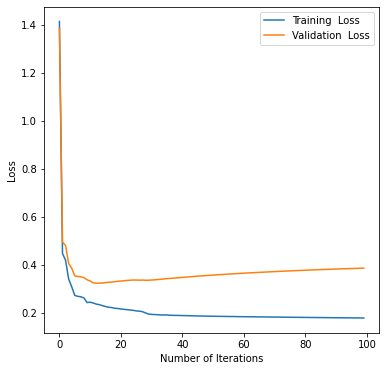

In [20]:
# model = MyNeuralNetwork(5,[784,256,128,64,10],"relu",0.1,"normal",100,100)
# model.fit(x_train,y_train,x_val,y_val)
print(model.score(X_test,Y_test))
model.save("saved_models/128/linear_128")
plt.figure(figsize=(6,6))
plt.plot(range(len(model.training_loss)), model.training_loss, label = "Training  Loss" )
plt.plot(range(len(model.validation_loss)), model.validation_loss, label = "Validation  Loss" )
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.savefig("saved_models/128/linear_128.png")
plt.show()

In [24]:
my_model = pickle.load(open("saved_models/128/relu_128","rb"))
print("Model is: relu")
print("Training Accuracy :",my_model.score(x_train,y_train)*100)
print("Validation Accuracy :",my_model.score(x_val,y_val)*100)
print("Test Accuracy :",my_model.score(X_test,Y_test)*100)

my_model = pickle.load(open("saved_models/128/tanh_128","rb"))
print("Model is: tanh")
print("Training Accuracy :",my_model.score(x_train,y_train)*100)
print("Validation Accuracy :",my_model.score(x_val,y_val)*100)
print("Test Accuracy :",my_model.score(X_test,Y_test)*100)

my_model = pickle.load(open("saved_models/128/sigmoid_128","rb"))
print("Model is: sigmoid")
print("Training Accuracy :",my_model.score(x_train,y_train)*100)
print("Validation Accuracy :",my_model.score(x_val,y_val)*100)
print("Test Accuracy :",my_model.score(X_test,Y_test)*100)

my_model = pickle.load(open("saved_models/128/linear_128","rb"))
print("Model is: linear")
print("Training Accuracy :",my_model.score(x_train,y_train)*100)
print("Validation Accuracy :",my_model.score(x_val,y_val)*100)
print("Test Accuracy :",my_model.score(X_test,Y_test)*100)


Model is: relu
Training Accuracy : 100.0
Validation Accuracy : 96.79166666666667
Test Accuracy : 97.05
Model is: tanh
Training Accuracy : 100.0
Validation Accuracy : 96.41666666666666
Test Accuracy : 96.75
Model is: sigmoid
Training Accuracy : 99.575
Validation Accuracy : 95.96666666666667
Test Accuracy : 95.95
Model is: linear
Training Accuracy : 93.29166666666666
Validation Accuracy : 90.74166666666666
Test Accuracy : 91.05


In [ ]:
my_model = pickle.load(open("../../HW2/saved_models/128/relu_128","rb"))
print("Model is: relu")
print("Train",my_model.score(x_train,y_train)*100)
print("Vali",my_model.score(x_val,y_val)*100)
print("Test",my_model.score(X_test,Y_test)*100)

my_model = pickle.load(open("../../HW2/saved_models/128/tanh_128","rb"))
print("Model is: tanh")
print("Train",my_model.score(x_train,y_train)*100)
print("Vali",my_model.score(x_val,y_val)*100)
print("Test",my_model.score(X_test,Y_test)*100)

my_model = pickle.load(open("../../HW2/saved_models/128/sigmoid_128","rb"))
print("Model is: sigmoid")
print("Train",my_model.score(x_train,y_train)*100)
print("Vali",my_model.score(x_val,y_val)*100)
print("Test",my_model.score(X_test,Y_test)*100)

my_model = pickle.load(open("../../HW2/saved_models/128/linear_128","rb"))
print("Model is: linear")
print("Train",my_model.score(x_train,y_train)*100)
print("Vali",my_model.score(x_val,y_val)*100)
print("Test",my_model.score(X_test,Y_test)*100)


Model is: relu
Train 100.0
Vali 96.79166666666667
Test 97.05
Model is: tanh


In [10]:
# model = pickle.load(open("saved_models/100/relu_100","rb"))
# plt.figure(figsize=(6,6))
# plt.plot(range(len(model.training_loss)), model.training_loss, label = "Training  Loss" )
# plt.plot(range(len(model.validation_loss)), model.validation_loss, label = "Validation  Loss" )
# plt.xlabel('Number of Iterations')
# plt.ylabel('Loss')
# plt.title("Linear Activation")
# plt.legend()
# plt.savefig("relu_100.png")


# TSNE plots

In [37]:
import time
from sklearn.manifold import TSNE
my_model = pickle.load(open("saved_models/128/relu_128","rb"))
pre_activation,activation = my_model.feedforward(X_train)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, n_iter=1000)
tsne_results = tsne.fit_transform(activation[3])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.739s...
[t-SNE] Computed neighbors for 60000 samples in 41.644s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sa

In [38]:
tsne_results

array([[ 46.901505,  31.659822],
       [ 38.618065,  -8.005938],
       [ 14.307124, -24.061407],
       ...,
       [ 42.974834,  24.849058],
       [-25.229609,  11.114337],
       [ -8.245419,  11.540348]], dtype=float32)

In [39]:
activation[3].shape

(60000, 64)

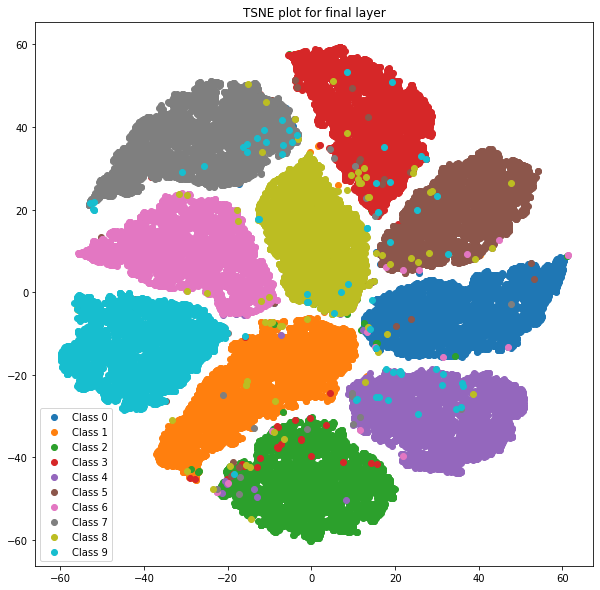

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(tsne_results[:,0][Y_train==0],tsne_results[:,1][Y_train==0],label="Class 0")
plt.scatter(tsne_results[:,0][Y_train==1],tsne_results[:,1][Y_train==1],label="Class 1")
plt.scatter(tsne_results[:,0][Y_train==2],tsne_results[:,1][Y_train==2],label="Class 2")
plt.scatter(tsne_results[:,0][Y_train==3],tsne_results[:,1][Y_train==3],label="Class 3")
plt.scatter(tsne_results[:,0][Y_train==4],tsne_results[:,1][Y_train==4],label="Class 4")
plt.scatter(tsne_results[:,0][Y_train==5],tsne_results[:,1][Y_train==5],label="Class 5")
plt.scatter(tsne_results[:,0][Y_train==6],tsne_results[:,1][Y_train==6],label="Class 6")
plt.scatter(tsne_results[:,0][Y_train==7],tsne_results[:,1][Y_train==7],label="Class 7")
plt.scatter(tsne_results[:,0][Y_train==8],tsne_results[:,1][Y_train==8],label="Class 8")
plt.scatter(tsne_results[:,0][Y_train==9],tsne_results[:,1][Y_train==9],label="Class 9")


plt.title("TSNE plot for final layer")
plt.savefig("tsne_final.png")
plt.legend()
plt.show()
